In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
df = pd.read_csv('housing.csv', header=None,delimiter='\s+')
X = df[range(13)]
y = df[13]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Построим и отрисуем кривые обучения для линейной регрессии и решающего дерева. В качестве метрики выберем MSE

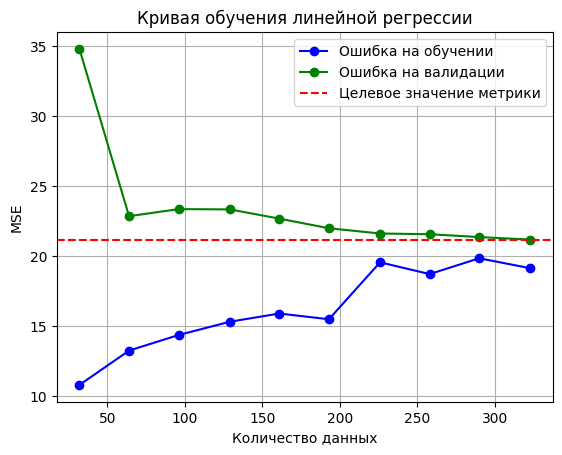

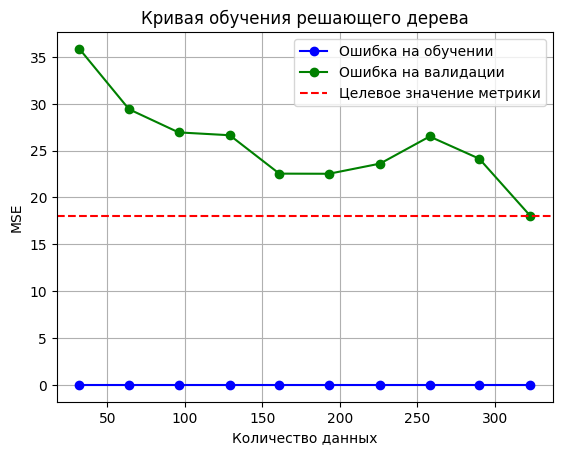

In [21]:
def plot_learning_curve(estimator, title, X, y, scoring='neg_mean_squared_error'):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y,
        cv=5, scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)
    train_mean = -np.mean(train_scores, axis=1)
    val_mean = -np.mean(val_scores, axis=1)
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Ошибка на обучении')
    plt.plot(train_sizes, val_mean, 'o-', color='green', label='Ошибка на валидации')
    plt.axhline(np.min(val_mean), color='red', linestyle='--', label='Целевое значение метрики')
    plt.title(title)
    plt.xlabel("Количество данных")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid()
    plt.show()

plot_learning_curve(LinearRegression(), "Кривая обучения линейной регрессии", X_train, y_train)
plot_learning_curve(DecisionTreeRegressor(random_state=0), "Кривая обучения решающего дерева",
                                            X_train, y_train)

Решающее дерево переобучилось, что соответствует большой ошибке на валидации и маленькой на трейне. При этом оно дает лучшее качество на валидации на этом датасете. Т.е. для датасета лучше подходит решающее дерево.

Последовательно выполним обучение моделей линейной регрессии, гребневой регуляризации (Ridge)  и Lasso регуляризации. Сравним модели, используя MSE и R2. Сведем значения весовых коэффициентов в единую таблицу.

In [16]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso()
}

weights = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2:", r2_score(y_test, y_pred))
    weights[name] = model.coef_
    

coef_df = pd.DataFrame(weights)
coef_df

LinearRegression
MSE: 33.448979997676524
R2: 0.589222384918251
Ridge
MSE: 34.23160611061534
R2: 0.5796111714164927
Lasso
MSE: 41.70009679994901
R2: 0.48789271561192593


,LinearRegression,Ridge,Lasso
0,-0.119443,-0.116808,-0.058890
1,0.044780,0.046003,0.053177
2,0.005485,-0.023762,-0.000000
3,2.340804,2.278150,0.000000
4,-16.123604,-8.557796,-0.000000
5,3.708709,3.755135,0.679550
6,-0.003121,-0.010414,0.016841
7,-1.386397,-1.280095,-0.648766
8,0.244178,0.222038,0.198738
9,-0.010990,-0.011526,-0.013994


Выводы:

Линейная регрессия обладает лучшим качеством.

Многие данные не являются важными (низкие веса у Lasso модели). Также имеется линейная зависимость признаков, т.к. много весов обычной линейной регрессии близки к нулю.